In [87]:
# !pip install scikit-plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [88]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

In [89]:
from sklearn.datasets import load_iris

frame = load_iris(as_frame=True)
df_orig = frame['data']
X = df_orig.values
y = np.array(frame['target'])

In [90]:
df_orig.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [91]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [92]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Partitioning

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
random_state = 0

In this case 40% of the data wil be used for testing and 60% for training. We pass an integer as random_state so every time will give us the same result. The result of this function will be a split of trainand test set.

In [95]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=random_state
)

This is a split without stratification so we have the same proportion of different classes in train and test set. 

In [96]:
# without stratify
print(np.unique(y, return_counts=True)[1] / len(y))
print(np.unique(y_train, return_counts=True)[1] / len(y_train))
print(np.unique(y_test, return_counts=True)[1] / len(y_test))

[0.33333333 0.33333333 0.33333333]
[0.37777778 0.3        0.32222222]
[0.26666667 0.38333333 0.35      ]


In [97]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=random_state
)

Now we have the same distribution of the 3 classes

In [98]:
# with stratify
print(np.unique(y, return_counts=True)[1] / len(y))
print(np.unique(y_train, return_counts=True)[1] / len(y_train))
print(np.unique(y_test, return_counts=True)[1] / len(y_test))

[0.33333333 0.33333333 0.33333333]
[0.33333333 0.33333333 0.33333333]
[0.33333333 0.33333333 0.33333333]


In [99]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(90, 4) (60, 4) (90,) (60,)


normalization

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
norm = StandardScaler()
norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

## Classifiers
Classifiers usually have a two main methods:
- `fit` method to train the classifier on training data
- `predict` method to validate/test the classifier on validation/test data

## KNN

In [102]:
from sklearn.neighbors import KNeighborsClassifier

We are classifiyng the x train that is normalized on the y label for the training part

In [103]:
clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="uniform")
clf.fit(X_train_norm, y_train)
dt_train_acc = clf.score(X_train_norm, y_train)
dt_test_acc = clf.score(X_test_norm, y_test)
print(f'Decision Tree train accuracy: {dt_train_acc}')
print(f'Decision Tree test accuracy: {dt_test_acc}')

Decision Tree train accuracy: 0.9555555555555556
Decision Tree test accuracy: 0.9833333333333333


These are the classes that the classifier predict for our x portion of data

In [104]:
# predict: Predict the class labels for the provided data.
y_test_pred = clf.predict(X_test_norm)
y_test_pred

array([2, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1, 0,
       2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 0, 1, 2,
       2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 1])

While these are the right labels

In [105]:
# y_test contains the target labels 
y_test

array([2, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1, 0,
       2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 0, 1, 2,
       2, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0, 1, 1])

So we can see the accuracy between the results of the classifier and the labels that we just know

In [106]:
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.9833333333333333


In [107]:
# score: Return the mean accuracy on the given test data and labels.
clf.score(X_test_norm, y_test)

0.9833333333333333

In [108]:
# KNeighborsClassifier.score is doing this
(y_test_pred == y_test).sum() / len(y_test)

0.9833333333333333

#### Performance evaluation

In [109]:
# print("F1:", f1_score(y_test, y_test_pred))

The line of code you're referring to is a Python command that uses the f1_score function from the sklearn.metrics library. This function calculates the F1 score, which is a measure of a test's accuracy.

The F1 score considers both the precision p and the recall r of the test to compute the score: 

F1 = 2 x p x r/p + r

Precision is the number of correct positive results divided by the number of all positive results, and recall is the number of correct positive results divided by the number of positive results that should have been returned.

The f1_score function is being called with the following arguments:

- y_test: the true labels for the test set.
- y_test_pred: the predicted labels for the test set, as given by a model.
- average="macro": this argument specifies that the F1 score should be calculated and then averaged across all classes in a macro manner. This means it calculates the F1 score independently for each class but does not take class imbalance into account. It then takes the average of these scores. The macro-averaged F1 score is a good way to understand the overall performance of a model on a dataset with multiple classes, especially when the class distribution is imbalanced.

In [110]:
print("F1:", f1_score(y_test, y_test_pred, average="macro"))

F1: 0.9833229101521784


In [111]:
print("F1:", f1_score(y_test, y_test_pred, average="micro"))

F1: 0.9833333333333333


In [112]:
print("F1:", f1_score(y_test, y_test_pred, labels=[1], average="micro")) # we can specify the label on which calculate the F1

F1: 0.975609756097561


In [113]:
print("F1:", f1_score(y_test, y_test_pred, labels=[1], average="macro"))

F1: 0.975609756097561


The support tells us how much records belong to each class, so we have 20 records in our test set that belogns to class 0...

In [114]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      1.00      0.98        20
           2       1.00      0.95      0.97        20

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



We only have one record that is supposed to be belonging to class 2 but is predict that belong to class 1

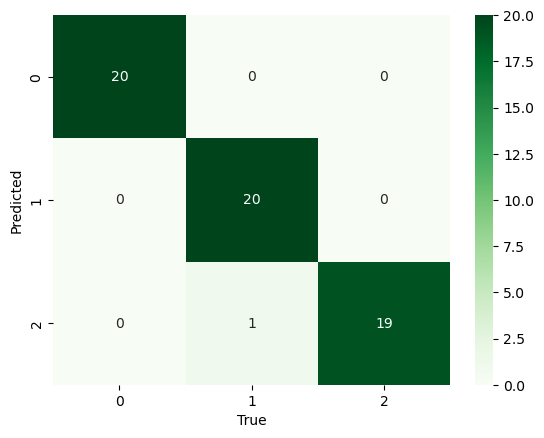

In [115]:
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

With predict_proba we can ask to return the probability to each record that we asked him to classify, here we show only ten records. The first have 0.8 to belong to class 2, so he will belong to the 2 class

In [116]:
# Return probability estimates for the test data X.
y_test_pred_proba = clf.predict_proba(X_test_norm) 
y_test_pred_proba[0:10]

array([[0. , 0.2, 0.8],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ]])

In [117]:
y_test_pred[0:10]

array([2, 2, 0, 2, 0, 0, 0, 2, 1, 1])

The predict probability is used to plot the ROC curve, on which we pass the ones that we know and the predictive probability that the model returns on the test set. We can see one ROC curve for every class, we have also the micro-average of the three different classes. In this example are every one on top to the other.

he Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. When dealing with multi-class classification, we can extend the ROC curve into two main averaging methods to handle multiple classes: micro-average and macro-average.

Here's the difference between the two:

## Micro-Average ROC Curve:
- Combines the contributions of all classes to compute the average ROC curve.
- In micro-averaging, all True Positives (TPs), False Positives (FPs), and False Negatives (FNs) are summed up across all classes to compute the average metrics.
- The micro-average ROC curve is computed globally by counting the total true positives, false negatives, and false positives, regardless of the class.
- This method gives equal weight to each individual instance prediction, which means it is influenced more by the classes with a larger number of instances. It is considered a useful measure when there is a class imbalance.

## Macro-Average ROC Curve:
- Calculates the metric independently for each class and then takes the average.
- Hence, all classes are given equal weight, regardless of their size.
- For the macro-average, the ROC curve for each class is calculated independently, and then the average of these curves is taken.
- The macro-average does not take label imbalance into account; it treats all classes equally, giving small classes the same weight as large ones.
- It can be misleading if the class distributions are highly imbalanced because it does not account for the frequency of each class.

In summary, the micro-average will account for class imbalance by considering the overall performance across all classes, while the macro-average treats all classes equally, calculating the metric for each class separately and then taking the average, potentially giving equal weight to the performance on rare events as to common events.

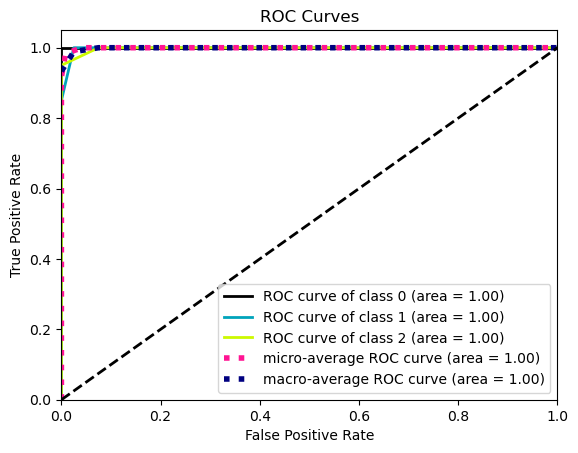

In [118]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, y_test_pred_proba)
plt.show()

With this function we can obtain the radio of the curve

In [119]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
roc_auc_score(y_test, y_test_pred_proba, multi_class="ovr", average="macro")

0.9987499999999999

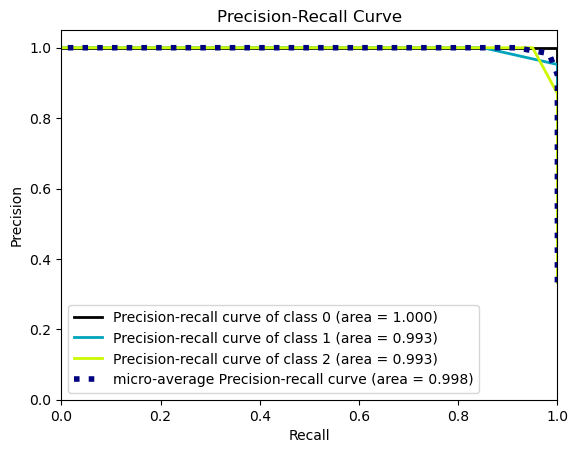

In [120]:
plot_precision_recall(y_test, y_test_pred_proba)
plt.show()

So firstly we split our data, in this case we have splitted it to have 60% to train the model and 40% to test the model. Most of the time when we want to measure our results we compare our ground truth labels and what the model predicted for each label. We can also repeated now splitting with different percentage our data. 

Each time we measure the accuracy and the error, so we obtain a overall estimate on what we obtainted. In different ones we can have different portion of the data using as test. 

#### Repeated Holdout

In [121]:
N = 50
err = 0

for i in range(N):
    # stratified holdout
    X_rh_train, X_rh_test, y_rh_train, y_rh_test = train_test_split(X, y, test_size=0.4, stratify=y)
    
    # normalize train set
    norm.fit(X_rh_train)
    X_rh_train_norm = norm.transform(X_rh_train)
    X_rh_test_norm = norm.transform(X_rh_test)

    # initialize and fit classifier
    clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="uniform")
    clf.fit(X_rh_train_norm, y_rh_train)

    # computing error
    acc = clf.score(X_rh_test_norm, y_rh_test)
    err += 1 - acc

print("Overall error estimate:", err/N)

Overall error estimate: 0.047666666666666656


A better alternative to this last repeated loop is the cross validation, we initialize out classifier, we call the function passing the parameter x train and y train, so we only pass the train part of our data. 

#### Cross-validation
https://scikit-learn.org/stable/modules/cross_validation.html

In [122]:
from sklearn.model_selection import cross_val_score
k = 10

we obtain the various result for the cross validation, so in each run the cross validation is using one portion of the training set as a validation set and all the rest to training model. We have kind of evaulting of what our model is oding by fitting it, and validating it in another smaller portion of the training set, so we're using in each run a different portion of the training set as a validation set. 

This is can be used to better initialize the method, until now we initiliaze our K-NN with k=5 eucliedain and uniform, if the nearest neighbir

In [123]:
# initialize classifier
clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="uniform")

scores = cross_val_score(clf, X_train_norm, y_train, cv=k) # we call the 10 cross validation only on the training portion of our data
scores

array([0.88888889, 1.        , 1.        , 1.        , 0.77777778,
       1.        , 0.55555556, 0.88888889, 1.        , 1.        ])

In [124]:
print("Overall error estimate:", 1 - scores.mean()) 

Overall error estimate: 0.0888888888888889


In [125]:
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std()))

Accuracy: 0.9111 (+/- 0.14)


In [126]:
# scoring default is accuracy
cross_val_score(clf, X_train_norm, y_train, cv=k, scoring='f1_macro')

array([0.88571429, 1.        , 1.        , 1.        , 0.77777778,
       1.        , 0.55555556, 0.88571429, 1.        , 1.        ])

### Hyperparameters Tuning

In each loop we use a different k for the k nearest neighbor. We're fitting the method on the training set and we're measuring what happens on the test, set, so the accurayc on the test set. 

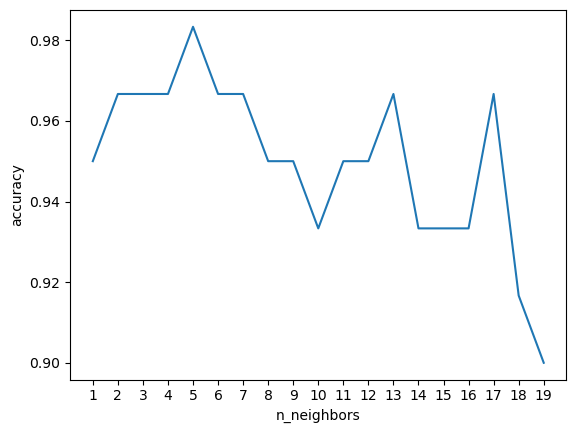

In [127]:
n_neighbors = range(1,20)
scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean", weights="uniform")
    clf.fit(X_train_norm, y_train)
    scores.append(clf.score(X_test_norm, y_test))

plt.plot(scores)
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()

We can use the cross validation inside the loop and after calculate the mean and the std. From the plot we can observe that 12 might be a good numer for neighbors, the mean is the highest and also for twelve the std is also much less present. 

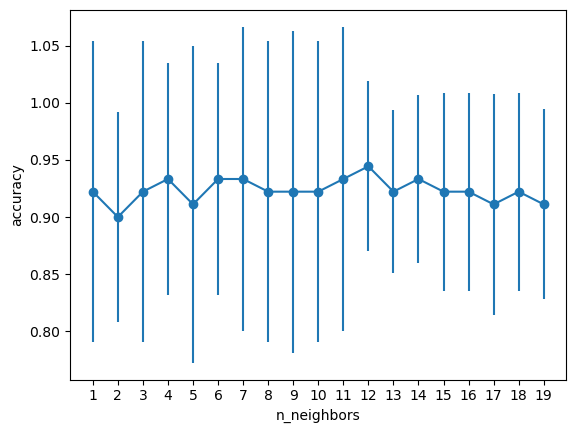

In [128]:
n_neighbors = range(1,20)
avg_scores = list()
std_scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean", weights="uniform")
    scores = cross_val_score(clf, X_train_norm, y_train, cv=k)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

#plt.plot(avg_scores)
plt.errorbar(range(len(n_neighbors)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()

Now we measure the performance on the test set. We're measuring the accuracy on the training set and not as before, specifically on different portion. We've an idea on what can be the best initialization to test our model on the final test set. 

In [129]:
clf = KNeighborsClassifier(n_neighbors=12, metric="euclidean", weights="uniform")
clf.fit(X_train_norm, y_train)
y_test_pred = clf.predict(X_test_norm)
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.95


# Grid Search

A grid search can help in the model selection or better on the parameter of the model. We are defined an object of all of the different values that we want to test. For the neighbors we want to run to 1 to the length of our training set, and we want also check the others parameters. 

In [130]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

- %%time: Questo è un comando magico di IPython che misura il tempo di esecuzione dell'intera cella in un Jupyter Notebook.

- param_grid: È un dizionario che contiene i parametri che vuoi ottimizzare. Qui vengono testate diverse configurazioni di n_neighbors (il numero di vicini per il KNN), weights (come pesare i vicini), e metric (la metrica di distanza da utilizzare).

- GridSearchCV:

- KNeighborsClassifier(): Il modello base che stai cercando di ottimizzare.
- param_grid=param_grid: La griglia di parametri che hai definito sopra.
- cv=RepeatedStratifiedKFold(random_state=0): Specifica il metodo di cross-validation da utilizzare. RepeatedStratifiedKFold è una variante di k-fold che ripete la cross-validation più volte e mantiene il bilanciamento della classe in ciascun fold.
- n_jobs=-1: Dice a scikit-learn di utilizzare tutti i processori disponibili per eseguire la cross-validation e la ricerca in parallelo.
- refit=True: Dopo aver trovato i migliori iperparametri, riallena il classificatore con l'intero set di allenamento.
- grid.fit(X_train_norm, y_train): Esegue la ricerca a griglia. Il metodo .fit() addestra i modelli utilizzando i dati normalizzati di allenamento X_train_norm e le etichette corrispondenti y_train.
- clf = grid.best_estimator_: Una volta completata la ricerca, l'attributo best_estimator_ del grid search contiene il modello con i migliori iperparametri trovati.

L'output indica che il tempo totale impiegato dal processo (compreso il tempo di CPU e il tempo "wall" che include anche il tempo di attesa per le risorse di sistema) è di circa 1.84 secondi. Questo tempo riflette quanto è stato efficiente il processo di ottimizzazione e formazione del modello KNN sul set di dati fornito.

In [131]:
%%time
param_grid = {
    "n_neighbors": np.arange(1, X_train.shape[0]//2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock"],
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True, 
    # verbose=2
)

grid.fit(X_train_norm, y_train)
clf = grid.best_estimator_

CPU times: user 953 ms, sys: 31.4 ms, total: 984 ms
Wall time: 1.65 s


Immagina il Grid Search come un concorso culinario dove devi trovare la migliore combinazione di ingredienti (parametri) per fare la torta più buona (il modello di machine learning più accurato).

- Gli Ingredienti (Parametri): Hai una varietà di ingredienti come farina, zucchero e uova, ma non sei sicuro delle quantità esatte per la torta perfetta. In termini di machine learning, hai parametri come n_neighbors, weights, e metric per il tuo classificatore KNN.

- Le Ricette (Griglia di Parametri): Crei un elenco di ricette che usano diverse quantità di questi ingredienti. Alcune usano più zucchero, altre più uova, e così via. Nel Grid Search, crei una param_grid che è una lista di tutte le combinazioni possibili dei parametri che vuoi provare.

- Il Concorso (Cross-Validation): Per essere giusti, ogni ricetta dovrebbe essere testata più volte per assicurarsi che il successo non sia solo un colpo di fortuna. Quindi, fai diverse prove della stessa ricetta (cross-validation) per ottenere un giudizio equilibrato sulla sua bontà.

- La Giuria (Fit e Score): Una giuria assaggia ogni torta fatta con ogni combinazione di ingredienti e dà un punteggio. Nel Grid Search, il metodo .fit() addestra il tuo modello su diverse combinazioni di parametri e valuta le prestazioni con un punteggio di precisione.

- Il Vincitore (Best Estimator): Dopo aver provato tutte le ricette, scegli quella con il punteggio più alto. Analogamente, Grid Search sceglie la combinazione di parametri che ha dato le migliori prestazioni e ti fornisce il best_estimator_, cioè il tuo modello "vincitore".

- Il Premio (Modello Ottimizzato): Ora hai una ricetta vincente che puoi usare ogni volta che vuoi fare la torta. Similmente, hai un modello di machine learning ottimizzato con i migliori parametri trovati che puoi usare per fare previsioni.

Nel tuo caso, il Grid Search esegue questo processo per il classificatore KNN, testando diverse quantità di "vicini" e diverse "metriche" per calcolare la distanza tra i punti. Alla fine, sceglie la combinazione che massimizza l'accuratezza del modello, il tutto nel tempo di 1.84 secondi, che è il tempo che hai impiegato per organizzare e completare il tuo "concorso culinario" di machine learning.

Accuracy is not a reliable metric when dealing with unbalanced classes. In our project, we can start by examining pairs of music genres, such as rock and pop, to conduct various tests. Since these genres are unbalanced, if we have 5 classes, our baseline accuracy would be 1 divided by 5. Considering there are 20 classes, we can begin with just two classes, like rock and pop, and then try adding another class, exploring this as an option. We can also tackle the multi-class problem. We write the code once and then simply change the different portions of the data. Another approach is the one versus rest strategy, where we identify our positive class as 1, and all the others as 0. It would be ideal if we can classify all twenty genres together with the model, as this presents the most challenge. We might also attempt to aggregate genres, deciding that certain classes are the same based on our analysis.

In [132]:
print(grid.best_params_, grid.best_score_)

{'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'distance'} 0.9466666666666665


In [133]:
y_test_pred = clf.predict(X_test_norm)
print("Accuracy:", accuracy_score(y_test, y_test_pred))
dt_train_acc = clf.score(X_train_norm, y_train)
dt_test_acc = clf.score(X_test_norm, y_test)
print(f'Decision Tree train accuracy: {dt_train_acc}')
print(f'Decision Tree test accuracy: {dt_test_acc}')

Accuracy: 0.9666666666666667
Decision Tree train accuracy: 1.0
Decision Tree test accuracy: 0.9666666666666667


In [134]:
clf.score(X_test_norm, y_test)

0.9666666666666667

In [135]:
# grid.cv_results_ 

we create a dataframe with the results of the grid search, and we put all the parameters and accuracy for each of different splits. In this case test refers to the fact that in each of different runs one portion of the training set is used as a validation set, even though here they are calling it test. 

In [136]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000251,0.000193,0.000782,0.000384,euclidean,1,uniform,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.888889,0.944444,...,0.944444,0.833333,1.000000,0.944444,0.944444,0.833333,0.944444,0.911111,0.060858,113
1,0.000275,0.000253,0.000359,0.000191,euclidean,1,distance,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.888889,0.944444,...,0.944444,0.833333,1.000000,0.944444,0.944444,0.833333,0.944444,0.911111,0.060858,113
2,0.000292,0.000599,0.000670,0.000077,euclidean,2,uniform,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.888889,0.888889,...,0.944444,0.888889,0.888889,0.944444,0.944444,0.833333,0.944444,0.900000,0.056656,140
3,0.000318,0.000499,0.000488,0.001038,euclidean,2,distance,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.888889,0.944444,...,0.944444,0.833333,1.000000,0.944444,0.944444,0.833333,0.944444,0.911111,0.060858,113
4,0.000198,0.000159,0.000747,0.000425,euclidean,3,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.888889,0.888889,...,0.944444,0.888889,0.944444,0.944444,0.944444,0.888889,1.000000,0.925556,0.056229,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0.000132,0.000053,0.001075,0.001086,cityblock,42,distance,"{'metric': 'cityblock', 'n_neighbors': 42, 'we...",0.833333,0.944444,...,0.944444,0.833333,0.944444,0.833333,0.944444,0.944444,0.944444,0.926667,0.063285,57
172,0.000328,0.001362,0.002264,0.008572,cityblock,43,uniform,"{'metric': 'cityblock', 'n_neighbors': 43, 'we...",0.888889,0.888889,...,0.888889,0.777778,1.000000,0.833333,0.777778,0.888889,0.888889,0.897778,0.058119,147
173,0.000279,0.000977,0.004012,0.009238,cityblock,43,distance,"{'metric': 'cityblock', 'n_neighbors': 43, 'we...",0.833333,0.944444,...,0.944444,0.833333,1.000000,0.833333,0.944444,0.944444,0.944444,0.930000,0.062667,34
174,0.000183,0.000177,0.003121,0.007791,cityblock,44,uniform,"{'metric': 'cityblock', 'n_neighbors': 44, 'we...",0.833333,0.833333,...,0.888889,0.666667,0.888889,0.833333,0.944444,0.888889,0.833333,0.873333,0.069424,174


In [137]:
results["metric_weight"] = results["param_metric"] + ", " + results["param_weights"]

<Axes: xlabel='param_n_neighbors', ylabel='mean_test_score'>

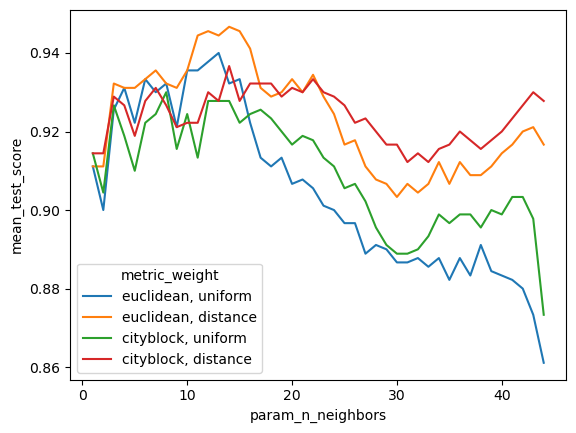

In [138]:
sns.lineplot(
    data=results, x="param_n_neighbors", y="mean_test_score", hue="metric_weight"
)

### Naive Bayes

In [139]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

#### Gaussian

In [140]:
clf = GaussianNB()

In [141]:
%%time
clf.fit(X_train, y_train)

CPU times: user 3.88 ms, sys: 927 µs, total: 4.81 ms
Wall time: 1.2 ms


GaussianNB()

In [142]:
y_pred = clf.predict(X_test)
y_pred

array([2, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1, 0,
       2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 0, 1, 2,
       2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2])

In [143]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      0.95      0.95        20
           2       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [144]:
clf.predict_proba(X_test)

array([[3.05055218e-156, 1.98469602e-002, 9.80153040e-001],
       [2.50142195e-277, 3.75932821e-012, 1.00000000e+000],
       [1.00000000e+000, 2.74048199e-017, 2.82825801e-026],
       [3.77047257e-248, 6.87918788e-010, 9.99999999e-001],
       [1.00000000e+000, 1.81924966e-016, 2.52343415e-026],
       [1.00000000e+000, 5.84024273e-017, 8.14494337e-027],
       [1.00000000e+000, 1.12344252e-016, 5.92512274e-026],
       [6.19173845e-176, 4.67941390e-004, 9.99532059e-001],
       [1.10238158e-032, 9.99999857e-001, 1.43256972e-007],
       [7.56032487e-075, 9.99968118e-001, 3.18821921e-005],
       [1.00000000e+000, 1.66546269e-010, 2.54675324e-019],
       [3.73265040e-154, 6.58305961e-002, 9.34169404e-001],
       [0.00000000e+000, 1.70481203e-012, 1.00000000e+000],
       [1.00000000e+000, 6.04531187e-012, 4.37830158e-020],
       [1.35690609e-092, 9.96128400e-001, 3.87159969e-003],
       [7.97250163e-267, 3.29344440e-010, 1.00000000e+000],
       [1.86513942e-098, 9.78842746e-001

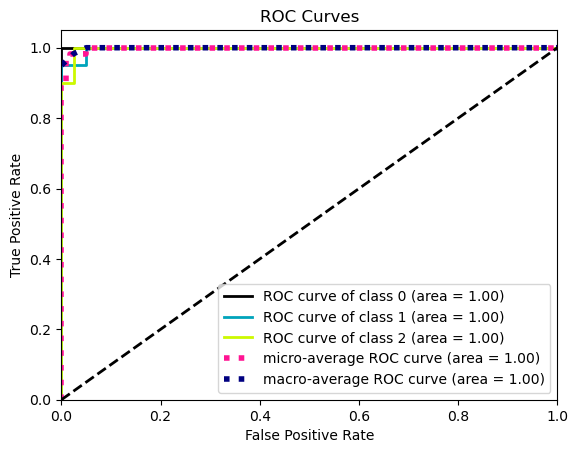

0.9983333333333334


In [145]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))

### Wine dataset
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from 3 different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

In [146]:
from sklearn.datasets import load_wine

d = load_wine(as_frame=True)
df_orig = d["data"]
y = np.array(d["target"])

df_orig.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [147]:
# adding a fake categorical variable to see how to deal with it
cat_variable_1_values = ["red", "blue", "green"]
df_orig["color"] = [
    cat_variable_1_values[np.random.randint(0, len(cat_variable_1_values))]
    for _ in range(len(df_orig))
]

# creating an ordinal variable
df_orig["alcalinity_of_ash_binned"] = pd.qcut(
    df_orig["alcalinity_of_ash"], q=4, labels=False
)

X_orig = df_orig.values
df_orig.head()

# one-hot encoding of categorical data
categorical_cols = ["color"]

df = pd.get_dummies(df_orig, columns=categorical_cols)
X = df.values
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcalinity_of_ash_binned,color_blue,color_green,color_red
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,True,False,False
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,False,True,False
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1,False,True,False
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,False,False,True
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2,False,True,False


In [148]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=random_state
)

In [149]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(124, 17) (54, 17) (124,) (54,)


Gaussian NB

In [150]:
clf = GaussianNB()

In [151]:
%%time
clf.fit(X_train, y_train)

CPU times: user 4.01 ms, sys: 1.25 ms, total: 5.26 ms
Wall time: 1.37 ms


GaussianNB()

In [152]:
y_pred = clf.predict(X_test)

In [153]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.95      0.95      0.95        21
           2       0.94      1.00      0.97        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.96      0.96      0.96        54



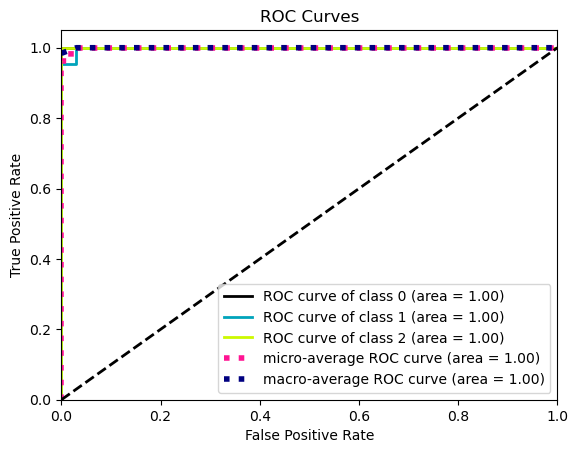

0.9995189995189996


In [154]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))

#### Categorical

In [155]:
non_cat_columns = [
    "alcohol",
    "malic_acid",
    "ash",
    "alcalinity_of_ash",
    "magnesium",
    "total_phenols",
    "flavanoids",
    "nonflavanoid_phenols",
    "proanthocyanins",
    "color_intensity",
    "hue",
    "od280/od315_of_diluted_wines",
    "proline",
]

X_noncat = df[non_cat_columns].values

X_train_noncat, X_test_noncat, y_train_noncat, y_test_noncat = train_test_split(
    X_noncat, y, test_size=0.3, stratify=y, random_state=random_state
)

# train and test set should be binned separately
X_train_cat = list()
for column_idx in range(X_train_noncat.shape[1]):
    X_train_cat.append(pd.qcut(X_train_noncat[:, column_idx], q=4, labels=False))
X_train_cat = np.array(X_train_cat).T

X_test_cat = list()
for column_idx in range(X_test_noncat.shape[1]):
    X_test_cat.append(pd.qcut(X_test_noncat[:, column_idx], q=4, labels=False))
X_test_cat = np.array(X_test_cat).T

print(X_train_cat.shape, X_test_cat.shape)

(124, 13) (54, 13)


In [156]:
clf = CategoricalNB()
clf.fit(X_train_cat, y_train_noncat)

CategoricalNB()

In [157]:
y_pred = clf.predict(X_test_cat)

In [158]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.90      0.95        21
           2       0.88      1.00      0.94        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



# Binary Classification Example

In [159]:
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve
# plot_cumulative_gain and plot_lift_curve only work in a binary classification case

In [160]:
from sklearn.datasets import load_breast_cancer

In [161]:
X, y = load_breast_cancer(return_X_y=True)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=random_state
)

In [163]:
clf = GaussianNB()

In [164]:
clf.fit(X_train, y_train)

GaussianNB()

In [165]:
y_test_pred_proba = clf.predict_proba(X_test)
y_test_pred_proba

array([[1.00000000e+000, 9.60798304e-067],
       [3.28452382e-012, 1.00000000e+000],
       [1.00000000e+000, 1.37358518e-029],
       [9.07175634e-001, 9.28243663e-002],
       [1.00000000e+000, 1.13066573e-026],
       [4.86470493e-011, 1.00000000e+000],
       [1.00000000e+000, 1.85354720e-229],
       [1.00000000e+000, 2.24061507e-034],
       [1.00000000e+000, 7.64991022e-020],
       [1.00000000e+000, 5.98723466e-025],
       [1.55676568e-010, 1.00000000e+000],
       [4.87665583e-012, 1.00000000e+000],
       [2.51652415e-014, 1.00000000e+000],
       [3.35003877e-015, 1.00000000e+000],
       [1.00000000e+000, 7.27215795e-019],
       [1.00000000e+000, 5.01138848e-047],
       [1.00000000e+000, 3.84869046e-038],
       [5.11581566e-005, 9.99948842e-001],
       [1.00000000e+000, 5.99928618e-030],
       [1.00000000e+000, 8.93234543e-263],
       [9.23899517e-016, 1.00000000e+000],
       [1.22947094e-013, 1.00000000e+000],
       [4.60035794e-013, 1.00000000e+000],
       [1.0

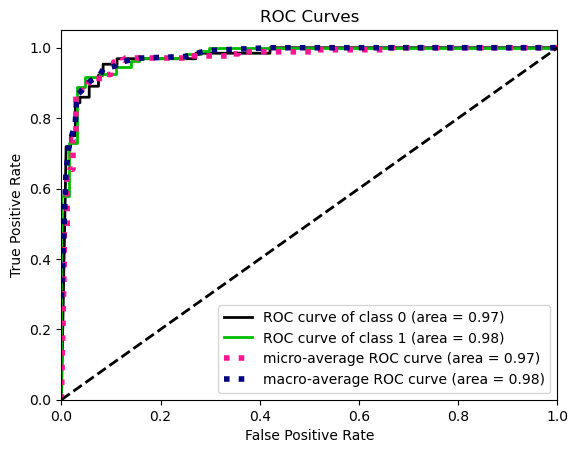

In [166]:
plot_roc(y_test,y_test_pred_proba)
plt.show()

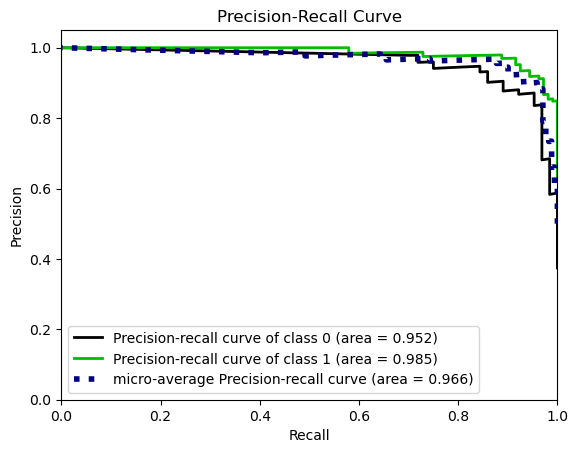

In [167]:
plot_precision_recall(y_test, y_test_pred_proba)
plt.show()

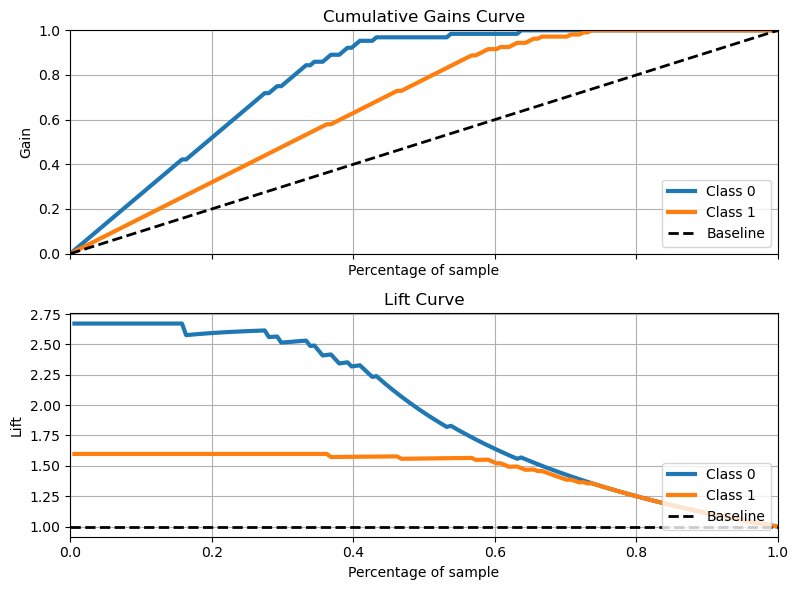

In [168]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8,6))
plot_cumulative_gain(y_test, y_test_pred_proba, ax=axs[0])
plot_lift_curve(y_test, y_test_pred_proba, ax=axs[1])
plt.tight_layout()
plt.show()